### Visualize relationship and Correlation between attributes of Olympic golds

In [1]:
# importing required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Reading dataset
df = pd.read_csv('olympics.csv',header = 4)

In [3]:
#Reading first few records
df.head(5)

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
0,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100m freestyle,M,Gold
1,Athens,1896,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100m freestyle,M,Silver
2,Athens,1896,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100m freestyle for sailors,M,Bronze
3,Athens,1896,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100m freestyle for sailors,M,Gold
4,Athens,1896,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100m freestyle for sailors,M,Silver


In [4]:
#Checking shape of the dataset
df.shape

(29216, 10)

- We have 29216 rows and 10 columns in our data

In [5]:
# Checking information and datatypes for our data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29216 entries, 0 to 29215
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   City          29216 non-null  object
 1   Edition       29216 non-null  int64 
 2   Sport         29216 non-null  object
 3   Discipline    29216 non-null  object
 4   Athlete       29216 non-null  object
 5   NOC           29216 non-null  object
 6   Gender        29216 non-null  object
 7   Event         29216 non-null  object
 8   Event_gender  29216 non-null  object
 9   Medal         29216 non-null  object
dtypes: int64(1), object(9)
memory usage: 2.2+ MB


- Except Edition everything in our dataset is of object datatype

In [6]:
#Checking null values in our dataset
df.isnull().sum()

City            0
Edition         0
Sport           0
Discipline      0
Athlete         0
NOC             0
Gender          0
Event           0
Event_gender    0
Medal           0
dtype: int64

- No Null values in our dataset

In [7]:
# Checking number of duplicate values
df[df.duplicated()]

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
16099,Moscow,1980,Hockey,Hockey,"SINGH, Singh",IND,Men,hockey,M,Gold


In [8]:
#There is one duplicate we will drop that
df.drop_duplicates(inplace=True)
#Checking shape after dropping
df.shape

(29215, 10)

## Data Visualisation
### Univariate analysis

In [9]:
# Top 10 Sport with most atheletes
df_sports = df.Sport.value_counts().head(10)
df_sports

Aquatics      3828
Athletics     3448
Rowing        2523
Gymnastics    2214
Fencing       1547
Football      1387
Hockey        1324
Wrestling     1140
Shooting      1105
Sailing       1061
Name: Sport, dtype: int64

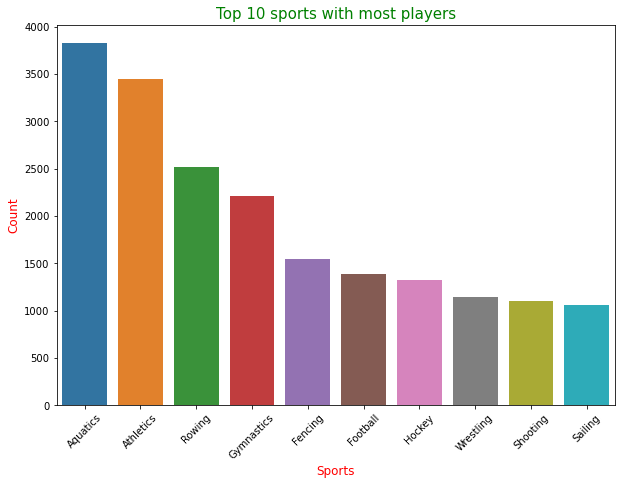

In [10]:
#sports with most players
plt.figure(figsize = (10, 7))
sns.barplot(x = df_sports.keys(), y = df_sports.values)
plt.title('Top 10 sports with most players',fontdict={'size':15,'color':'green'})
plt.ylabel('Count',fontdict={'size':12,'color':'red'})
plt.xlabel('Sports',fontdict={'size':12,'color':'red'})
plt.xticks(rotation = 45)
plt.show()

- Aquatic and atheletics had most number of players.

In [11]:
# Top 10 Countries with most atheletes
df_Country = df.NOC.value_counts().head(10)
df_Country

USA    4335
URS    2049
GBR    1594
FRA    1314
ITA    1228
GER    1211
AUS    1075
HUN    1053
SWE    1021
GDR     825
Name: NOC, dtype: int64

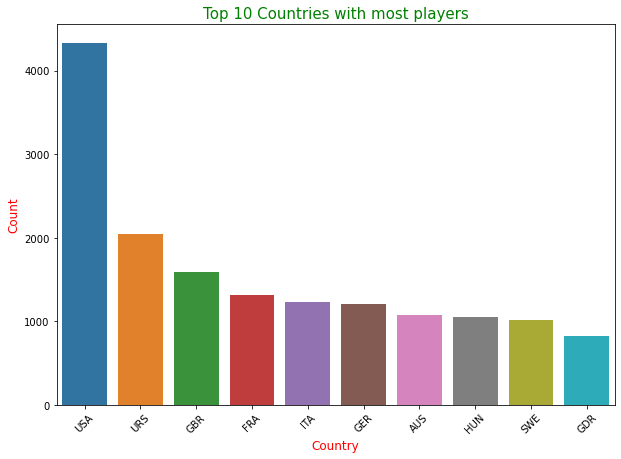

In [12]:
#Countries with most players
plt.figure(figsize = (10, 7))
sns.barplot(x = df_Country.keys(), y = df_Country.values)
plt.title('Top 10 Countries with most players',fontdict={'size':15,'color':'green'})
plt.ylabel('Count',fontdict={'size':12,'color':'red'})
plt.xlabel('Country',fontdict={'size':12,'color':'red'})
plt.xticks(rotation = 45)
plt.show()

- USA has the most number of players

In [13]:
#Edition with most number of players.
df_Edition = df.Edition.value_counts().head(10)
df_Edition

2008    2042
2000    2015
2004    1998
1996    1859
1992    1705
1988    1546
1984    1459
1980    1386
1976    1305
1920    1298
Name: Edition, dtype: int64

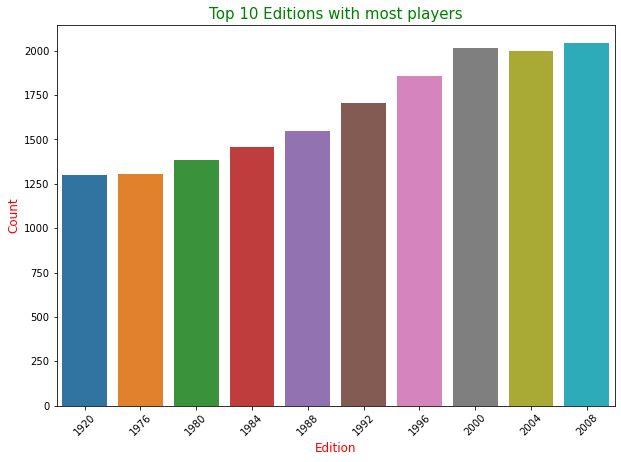

In [14]:
#Edition with most players
plt.figure(figsize = (10, 7))
sns.barplot(x = df_Edition.keys(), y = df_Edition.values)
plt.title('Top 10 Editions with most players',fontdict={'size':15,'color':'green'})
plt.ylabel('Count',fontdict={'size':12,'color':'red'})
plt.xlabel('Edition',fontdict={'size':12,'color':'red'})
plt.xticks(rotation = 45)
plt.show()

- 2008 had most number of players

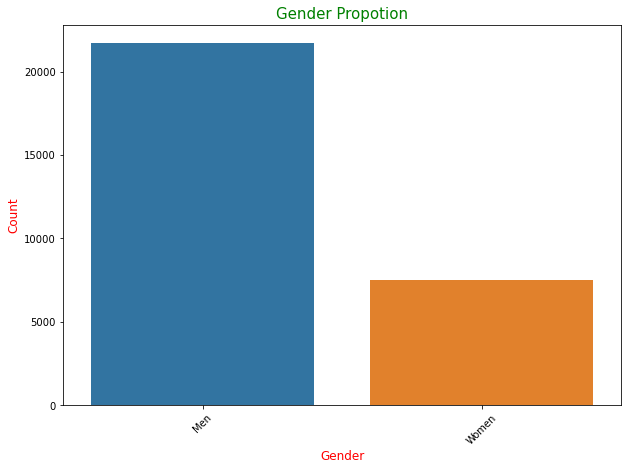

In [15]:
# Gender propotion in all years
df_Gender = df.Gender.value_counts()
plt.figure(figsize = (10, 7))
sns.barplot(x = df_Gender.keys(), y = df_Gender.values)
plt.title('Gender Propotion',fontdict={'size':15,'color':'green'})
plt.ylabel('Count',fontdict={'size':12,'color':'red'})
plt.xlabel('Gender',fontdict={'size':12,'color':'red'})
plt.xticks(rotation = 45)
plt.show()

- There are more than double of men as compared to women



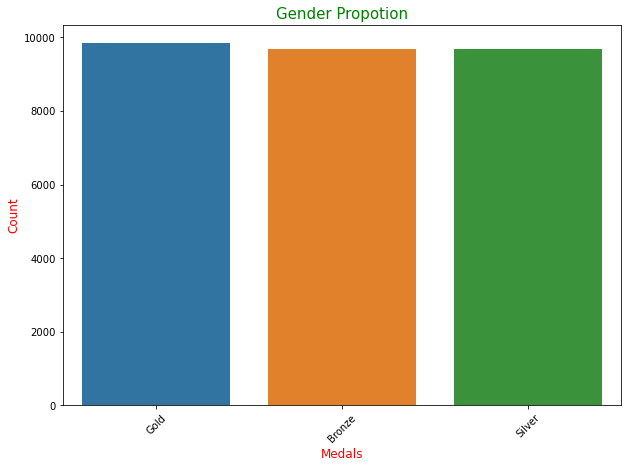

In [16]:
# Medal propotion in all years
df_Medal = df.Medal.value_counts()
plt.figure(figsize = (10, 7))
sns.barplot(x = df_Medal.keys(), y = df_Medal.values)
plt.title('Gender Propotion',fontdict={'size':15,'color':'green'})
plt.ylabel('Count',fontdict={'size':12,'color':'red'})
plt.xlabel('Medals',fontdict={'size':12,'color':'red'})
plt.xticks(rotation = 45)
plt.show()

- Number of medals are equal in each category.

### Bivariate analysis

In [17]:
# Gender propotion in top 10 sports.
top_10_sports = df['Sport'].value_counts().head(10).index.tolist()
filtered_df = df[df['Sport'].isin(top_10_sports)]

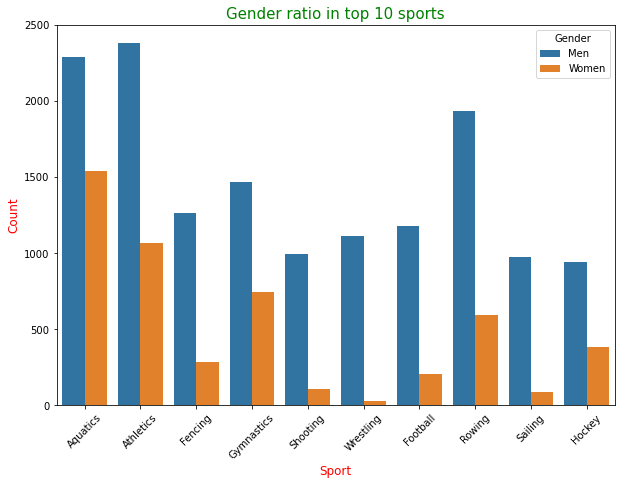

In [18]:
#Edition with most players
plt.figure(figsize = (10, 7))
sns.countplot(filtered_df.Sport, hue=filtered_df.Gender)
plt.title('Gender ratio in top 10 sports',fontdict={'size':15,'color':'green'})
plt.ylabel('Count',fontdict={'size':12,'color':'red'})
plt.xlabel('Sport',fontdict={'size':12,'color':'red'})
plt.xticks(rotation = 45)
plt.show()

- The propotion fo females in Aquatics, Atheletics and Gymnastics is higher as compared to other sports.
- Wrestling is having least gender ratio.

In [19]:
# Gender propotion in top 10 Countries.
top_10_NOC = df['NOC'].value_counts().head(10).index.tolist()
filtered_df = df[df['NOC'].isin(top_10_NOC)]

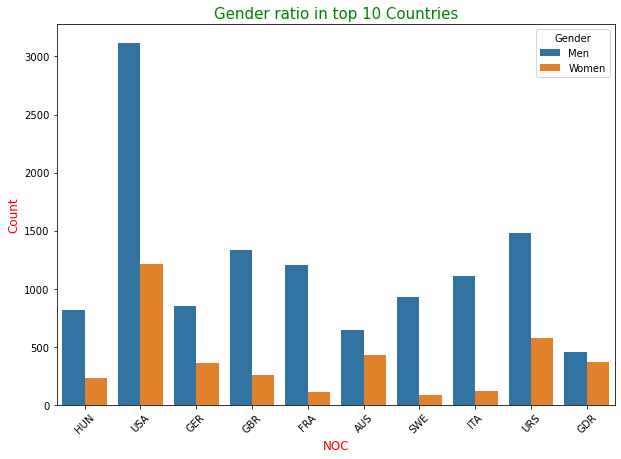

In [20]:
#Edition with most players
plt.figure(figsize = (10, 7))
sns.countplot(filtered_df.NOC, hue=filtered_df.Gender)
plt.title('Gender ratio in top 10 Countries',fontdict={'size':15,'color':'green'})
plt.ylabel('Count',fontdict={'size':12,'color':'red'})
plt.xlabel('NOC',fontdict={'size':12,'color':'red'})
plt.xticks(rotation = 45)
plt.show()

- France, Sqitzerland and Italy has less gender ratio.

In [21]:
# Gender propotion in top 10 Editions.
top_10_Edition = df['Edition'].value_counts().head(10).index.tolist()
filtered_df = df[df['Edition'].isin(top_10_Edition)]

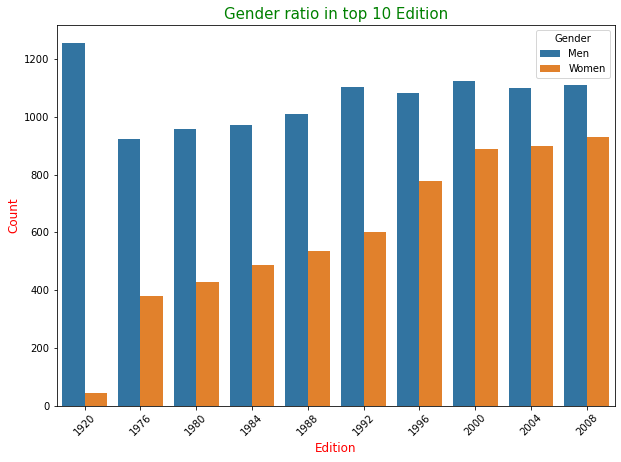

In [22]:
#Edition with most players
plt.figure(figsize = (10, 7))
sns.countplot(filtered_df.Edition, hue=filtered_df.Gender)
plt.title('Gender ratio in top 10 Edition',fontdict={'size':15,'color':'green'})
plt.ylabel('Count',fontdict={'size':12,'color':'red'})
plt.xlabel('Edition',fontdict={'size':12,'color':'red'})
plt.xticks(rotation = 45)
plt.show()

- With the progress of years gender ration improves.
- For 2000-2008 it remains almost contant.
- Number of males is almost constant each year but number of females is increasing.

In [23]:
# Gender propotion in Medal tally
Medal_tally = df['Medal'].value_counts().head(10).index.tolist()
filtered_df = df[df['Medal'].isin(Medal_tally)]

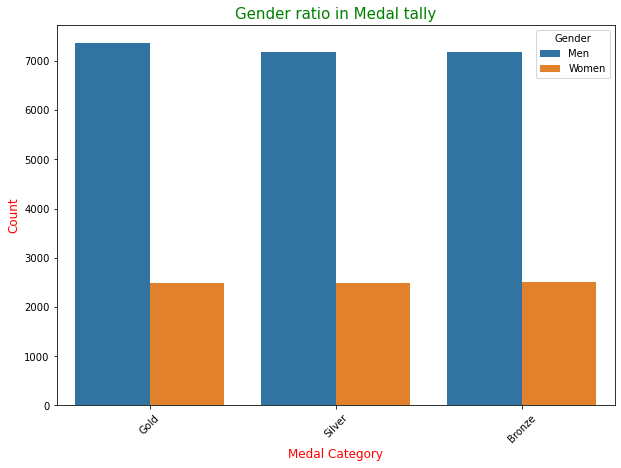

In [24]:
#Edition with most players
plt.figure(figsize = (10, 7))
sns.countplot(filtered_df.Medal, hue=filtered_df.Gender)
plt.title('Gender ratio in Medal tally',fontdict={'size':15,'color':'green'})
plt.ylabel('Count',fontdict={'size':12,'color':'red'})
plt.xlabel('Medal Category',fontdict={'size':12,'color':'red'})
plt.xticks(rotation = 45)
plt.show()

- Number of medals are constant over time for both genders.

In [25]:
# Medal propotions over year with gender as hue
#Filter the original dataframe and Create a pivot table that shows the count of medals 
# for each combination of year, medal, and gender
filtered_df = df[['Edition', 'Medal', 'Gender']]
pivot_df = pd.pivot_table(df, values='Athlete', index='Edition', columns=['Medal', 'Gender'], aggfunc='count')
pivot_df.head()

Medal   Bronze         Gold       Silver      
Gender     Men Women    Men Women    Men Women
Edition                                       
1896      40.0   NaN   64.0   NaN   47.0   NaN
1900     137.0   5.0  175.0   3.0  189.0   3.0
1904     121.0   2.0  182.0   6.0  155.0   4.0
1908     206.0   5.0  306.0   5.0  277.0   5.0
1912     274.0  10.0  291.0  10.0  290.0  10.0

In [26]:
# Normalize the pivot table to get the proportion of medals won by gender for each year
total_medals = pivot_df.sum(axis=1)
pivot_df = pivot_df.divide(total_medals, axis=0)

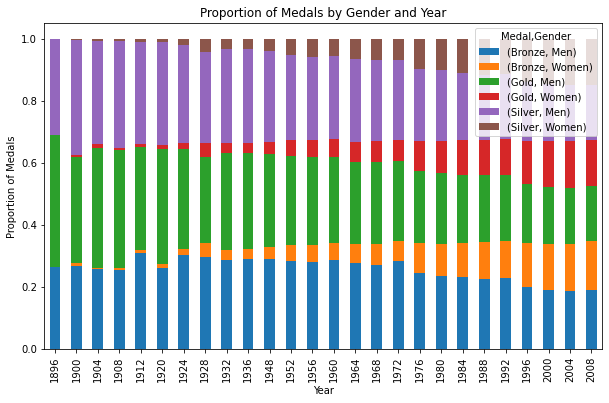

In [27]:
# Create a stacked bar chart to show the proportion of gold, silver, and bronze medals won by gender for each year
pivot_df.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Proportion of Medals by Gender and Year')
plt.xlabel('Year')
plt.ylabel('Proportion of Medals')
plt.show()

- It is evident that gender propotion of medal holders for gold, silver and bronze in above graph
- The count of women getting medals in increasing over years.

### Corelation matrix


In [28]:
# Checking column names to encode it to get correlation matrix
df.columns

Index(['City', 'Edition', 'Sport', 'Discipline', 'Athlete', 'NOC', 'Gender',
       'Event', 'Event_gender', 'Medal'],
      dtype='object')

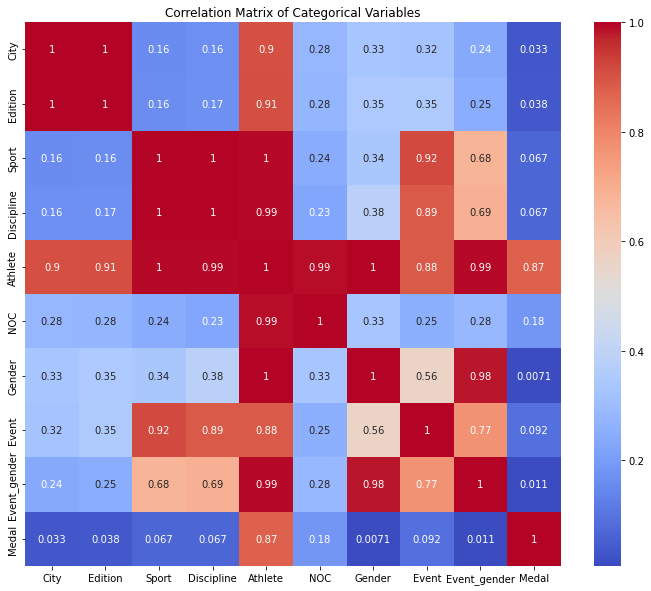

In [29]:
#importing chi2_contingency
from scipy.stats import chi2_contingency

# Compute the Cramer's V coefficient for each pair of variables
corr_matrix = np.zeros((len(df.columns), len(df.columns)))
corr_matrix_labels = list(df.columns)
for i in range(len(df.columns)):
    for j in range(len(df.columns)):
        if i == j:
            corr_matrix[i, j] = 1.0
        else:
            contingency_table = pd.crosstab(df.iloc[:, i], df.iloc[:, j])
            chi2_stat, _, _, _ = chi2_contingency(contingency_table)
            n = contingency_table.sum().sum()
            corr_matrix[i, j] = np.sqrt(chi2_stat / (n * (min(contingency_table.shape) - 1)))

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', xticklabels=corr_matrix_labels, yticklabels=corr_matrix_labels)

# Set the title of the plot
plt.title('Correlation Matrix of Categorical Variables')

# Show the plot
plt.show()


- <b>we used the chi2_contingency function to calculate the chi-squared statistic for each pair of categorical variables, and then used the resulting statistic to calculate the Cramer's V coefficient.</b>

- City and Edition shows high correlation
- Event shows high correaltion with Sport, Discipline, Athelte and Event_gender
- Athelete shows high correlation with everything
- Medal has nearly no correlation with any column, except athelete because there are chances athelte have high chances of winning again
- Event_gender shows medium correlation with Sport and Discipline.